<a href="https://colab.research.google.com/github/ansonkwokth/Bs2PhiMuMu_Z-pole/blob/master/TotalOddEven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ansonkwokth/TableTennisPrediction.git
%cd TableTennisPrediction

Cloning into 'TableTennisPrediction'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 295 (delta 81), reused 15 (delta 15), pack-reused 161 (from 1)
Receiving objects: 100% (295/295), 4.10 MiB | 7.70 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/TableTennisPrediction


In [37]:

import pandas as pd
from tabulate import tabulate
from utils import data_loader as dl

import numpy as np
from model.Elo import Elo
from model.ModifiedElo import ModifiedElo
from model.ensemble import BaggingRatingSystem

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import copy

import warnings
warnings.filterwarnings('ignore')

import itertools

In [209]:
def cal_odd_even(ps_set):
    odd = 0
    even = 0
    for k, v in ps_set.items():
        if (k % 2) == 0:
            even += v
        else:
            odd += v
    return {-1: odd, 1: even}


In [210]:
def find_out():

    possible_outcomes = []


    # Loop over all combinations of sets where one player wins 3 sets
    for i in itertools.product([1, 2], repeat=5):  # Max 5 sets
        # Count how many sets each player wins
        p1_sets_won = i.count(1)
        p2_sets_won = i.count(2)

        if p1_sets_won == 3 and p2_sets_won < 3:  # Player 1 wins
            possible_outcomes.append(i)
        elif p2_sets_won == 3 and p1_sets_won < 3:  # Player 2 wins
            possible_outcomes.append(i)




    possible_outcomes_clean = []
    for out in possible_outcomes:
        out_clean = []
        win1 = 0
        win2 = 0
        for i in out:
            out_clean.append(i)
            if i == 1: win1 += 1
            if i == 2: win2 += 1

            if win1 == 3 or win2 == 3:
                possible_outcomes_clean.append(out_clean)
                break

    return possible_outcomes_clean

In [211]:

def find_oe(out):
    possible_OE_outcomes = []
    # Loop over all combinations of sets where one player wins 3 sets
    for i in itertools.product([1, -1], repeat=len(out)):  # Max 5 sets
        possible_OE_outcomes.append(i)
    return possible_OE_outcomes


In [198]:
def find_p_oe(oe_p_sets, possible_outcomes_clean):
    p_parity = {-1: 0, 1: 0}


    for out in possible_outcomes_clean:

        possible_OE_outcomes = find_oe(out)
        for oe in possible_OE_outcomes:

            win1 = 0
            win2 = 0
            parity = 1
            p_tot = 1
            for i, winner in enumerate(out):
                prty = oe[i]

                if winner == 1: win1 += 1
                if winner == 2: win2 += 1

                parity *= prty

                p_set = oe_p_sets[winner]

                p_tot *= p_set[prty]

                if win1 == 3 or win2 == 3:
                    p_parity[parity] += p_tot
                    break

    return p_parity

In [213]:
modelMElo = ModifiedElo()

In [222]:
x = np.linspace(0.1, 0.9, 100)
y = []

for pwin in x:
    ps_set1 = modelMElo.predict_set_config_from_p(pwin)
    ps_set2 = modelMElo.predict_set_config_from_p(1 - pwin)

    p_oe1 = cal_odd_even(ps_set1)
    p_oe2 = cal_odd_even(ps_set2)
    oe_p_sets = {1: p_oe1, 2: p_oe2}
    possible_outcomes_clean = find_out()
    y.append((find_p_oe(oe_p_sets, possible_outcomes_clean))[-1])

y = np.array(y)

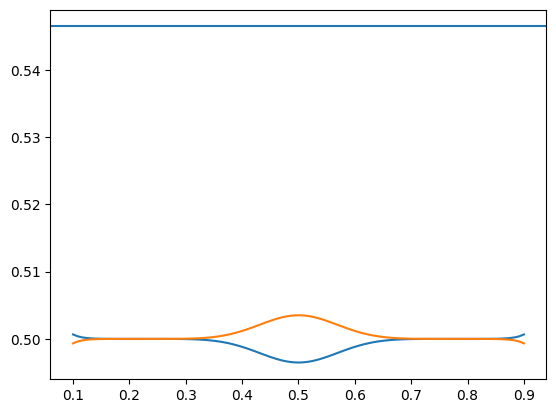

In [224]:
plt.plot(x, y)
plt.plot(x, 1-y)
plt.axhline(1/1.83)